# Benchmark Sachs Protein Signaling Dataset

## Sommaire des affichages

### Pendant la grid search (par algorithme) :
- **Bar chart** (1 hyperparametre) ou **heatmap** (2 hyperparametres) pour chaque metrique (SHD, F1, TPR) vs golden BN
- **Scatter SHD vs F1** de tous les profils avec le front de Pareto

### Apres la grid search :
Deux selections de profils :
- **Selection A** : profil Pareto-optimal avec le plus petit SHD
- **Selection B** : profil Pareto-optimal avec le plus grand F1

Pour chaque selection :
- **Scatter SHD vs F1** comparant tous les algos (1 point par algo, hyperparametres en legende)
- **CPDAGs** des structures apprises par chaque algo (+ golden BN pour reference)
- **Heatmaps pairwise** comparant les structures apprises entre elles (1 heatmap par metrique)

In [ ]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyagrum.lib.notebook as gnb

sns.set_theme(style="whitegrid", palette="tab10", font_scale=1.1)

project_root = Path.cwd().parent 
sys.path.insert(0, str(project_root))

from algorithms.CPCAdapter import CPCAdapter
from algorithms.CMIICAdapter import CMIICAdapter
from algorithms.MIICAdapter import MIICAdapter
from algorithms.GHCBDeuAdapter import GHCBDeuAdapter
from algorithms.NOTEARSAdapter import NOTEARSAdapter
from algorithms.LiNGAMAdapter import LiNGAMAdapter
from pipeline.Dataset import Dataset
from metrics.SHDMetric import SHDMetric
from metrics.F1ScoreMetric import F1ScoreMetric
from metrics.TPRMetric import TPRMetric
from data.sachs.load_ground_truth import load_sachs_ground_truth
from analysis.GridSearch import GridSearch
from analysis.ParetoSelector import pareto_front, best_pareto

## 1. Chargement des donnees

In [2]:
sachs_data = pd.read_csv(project_root / "data" / "sachs" / "sachs_observational.csv", sep="\t")
ground_truth = load_sachs_ground_truth(version="bn18", as_structure=True)

dataset = Dataset(
    sachs_data.to_numpy(),
    golden_structure=ground_truth,
    name="sachs_observational",
    feature_names=list(sachs_data.columns),
)

print(f"Dataset: {sachs_data.shape[0]} samples, {sachs_data.shape[1]} variables")
print(f"Ground truth: {ground_truth.cpdag.sizeArcs()} arcs, {ground_truth.cpdag.sizeEdges()} edges")

Dataset: 853 samples, 11 variables
Ground truth: 18 arcs, 0 edges


## 2. Configuration

In [3]:
metrics = [SHDMetric(), F1ScoreMetric(), TPRMetric()]
metric_names = [m.name() for m in metrics]
objectives = {"SHD": True, "F1-Score": False, "TPR": False}
pareto_objectives = {"SHD": True, "F1-Score": False}

algo_configs = [
    ("CPC v1",    CPCAdapter,      {"alpha": [0.001, 0.01, 0.05, 0.10], "max_conditioning_set_size": [2, 3, 4, 5]}, {"version": 1}),
    ("CPC2 v2",   CPCAdapter,      {"alpha": [0.001, 0.01, 0.05, 0.10], "max_conditioning_set_size": [2, 3, 4, 5]}, {"version": 2}),
    ("CMIIC v1",  CMIICAdapter,    {"alpha": [0.001, 0.01, 0.05, 0.10]}, {"version": 1}),
    ("CMIIC2 v2", CMIICAdapter,    {"alpha": [0.001, 0.01, 0.05, 0.10]}, {"version": 2}),
    ("MIIC",      MIICAdapter,     {"n_bins": [2, 3, 4, 5, 6], "discretization_method": ["quantile", "hartemink"]}, {}),
    ("GHC+BDeu",  GHCBDeuAdapter,  {"n_bins": [2, 3, 4, 5, 6], "discretization_method": ["quantile", "hartemink"]}, {}),
    ("NOTEARS",   NOTEARSAdapter,  {"lambda1": [0.01, 0.05, 0.1, 0.2, 0.5], "w_threshold": [0.1, 0.2, 0.3, 0.5]}, {}),
    ("LiNGAM",    LiNGAMAdapter,   {"measure": ["pwling"], "threshold": [0.001, 0.005, 0.01, 0.05]}, {}),
]

# Map algo names to (class, fixed_params) for re-running later
algo_configs_map = {name: (cls, fp) for name, cls, _, fp in algo_configs}

## 3. Grid search + visualisation par algorithme


Grid Search: CPCAdapter
  Fixed params: version=1
  Metrics: SHD, F1-Score, TPR
  Parameter combinations: 16

  [1/16] alpha=0.001, max_conditioning_set_size=2 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [2/16] alpha=0.001, max_conditioning_set_size=3 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [3/16] alpha=0.001, max_conditioning_set_size=4 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [4/16] alpha=0.001, max_conditioning_set_size=5 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [5/16] alpha=0.01, max_conditioning_set_size=2 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [6/16] alpha=0.01, max_conditioning_set_size=3 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [7/16] alpha=0.01, max_conditioning_set_size=4 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [8/16] alpha=0.01, max_conditioning_set_size=5 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [9/16] alpha=0.05, max_conditioning_set_size=2 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [10/16] alpha=0.05, max_conditioning_

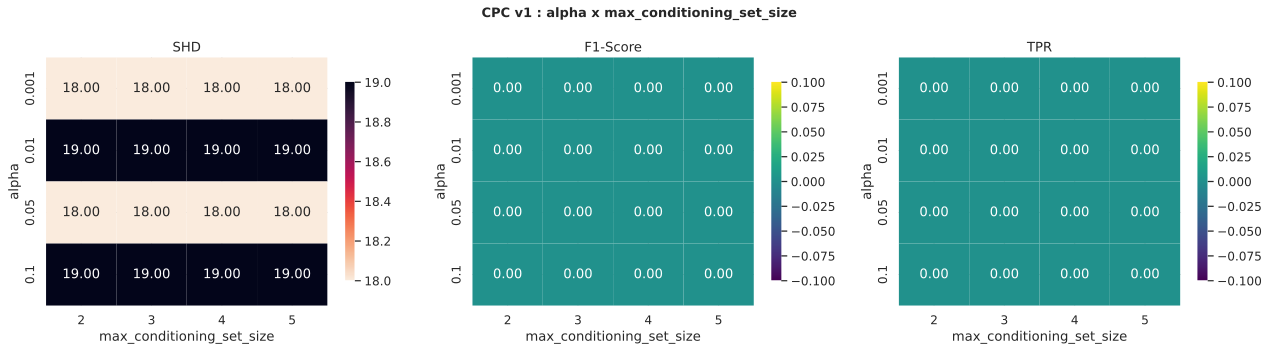

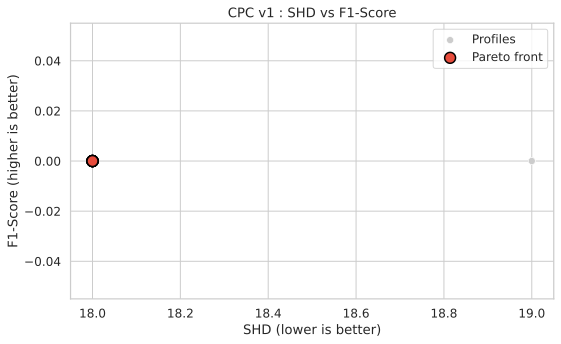


Grid Search: CPCAdapter
  Fixed params: version=2
  Metrics: SHD, F1-Score, TPR
  Parameter combinations: 16

  [1/16] alpha=0.001, max_conditioning_set_size=2 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [2/16] alpha=0.001, max_conditioning_set_size=3 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [3/16] alpha=0.001, max_conditioning_set_size=4 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [4/16] alpha=0.001, max_conditioning_set_size=5 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [5/16] alpha=0.01, max_conditioning_set_size=2 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [6/16] alpha=0.01, max_conditioning_set_size=3 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [7/16] alpha=0.01, max_conditioning_set_size=4 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [8/16] alpha=0.01, max_conditioning_set_size=5 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [9/16] alpha=0.05, max_conditioning_set_size=2 ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [10/16] alpha=0.05, max_conditioning_

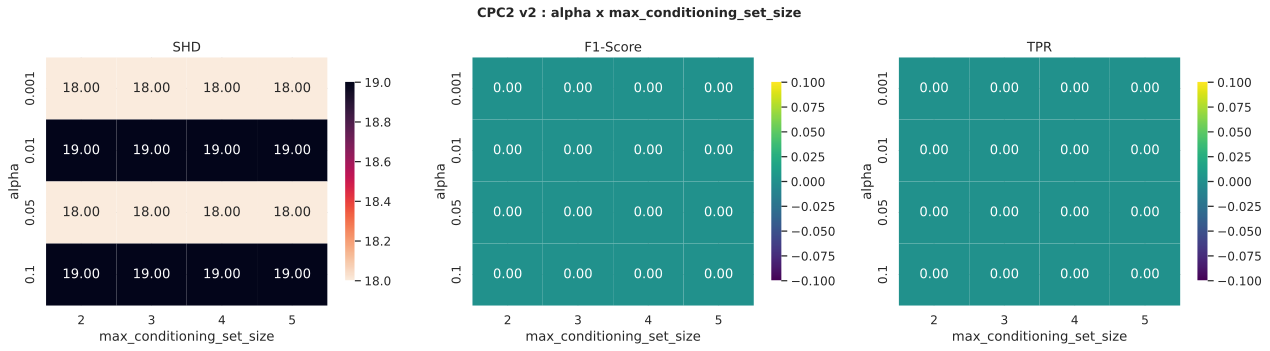

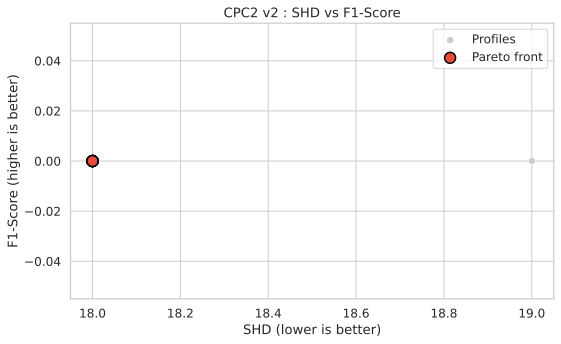


Grid Search: CMIICAdapter
  Fixed params: version=1
  Metrics: SHD, F1-Score, TPR
  Parameter combinations: 4

  [1/4] alpha=0.001 ... FAILED - [pyAgrum] Partially directed cycle detected: Add a partial directed cycle in a PDAG : between 5 and 4
  [2/4] alpha=0.01 ... SHD=26.0000, F1-Score=0.0000, TPR=0.0000
  [3/4] alpha=0.05 ... SHD=22.0000, F1-Score=0.0000, TPR=0.0000
  [4/4] alpha=0.1 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000

  Best SHD: 19.0000
    params: {'alpha': 0.1}

  Best F1-Score: 0.0000
    params: {'alpha': 0.01}

  Best TPR: 0.0000
    params: {'alpha': 0.01}




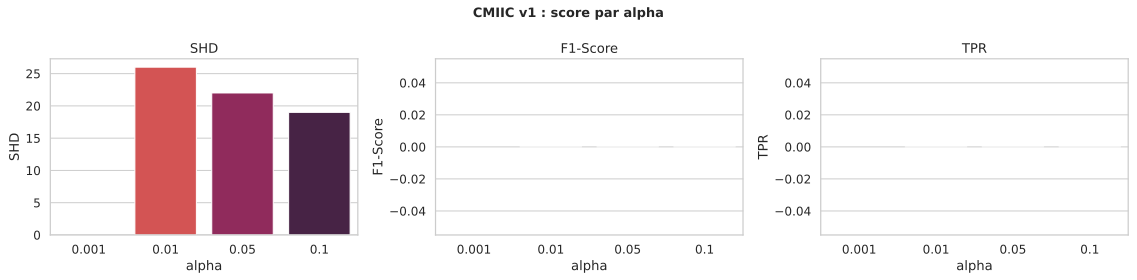

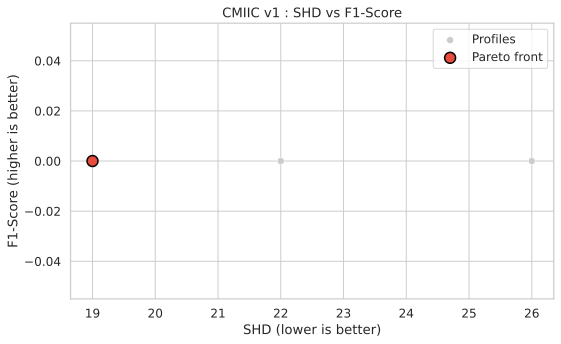


Grid Search: CMIICAdapter
  Fixed params: version=2
  Metrics: SHD, F1-Score, TPR
  Parameter combinations: 4

  [1/4] alpha=0.001 ... FAILED - [pyAgrum] Partially directed cycle detected: Add a partial directed cycle in a PDAG : between 7 and 5
  [2/4] alpha=0.01 ... SHD=26.0000, F1-Score=0.0000, TPR=0.0000
  [3/4] alpha=0.05 ... SHD=22.0000, F1-Score=0.0000, TPR=0.0000
  [4/4] alpha=0.1 ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000

  Best SHD: 19.0000
    params: {'alpha': 0.1}

  Best F1-Score: 0.0000
    params: {'alpha': 0.01}

  Best TPR: 0.0000
    params: {'alpha': 0.01}




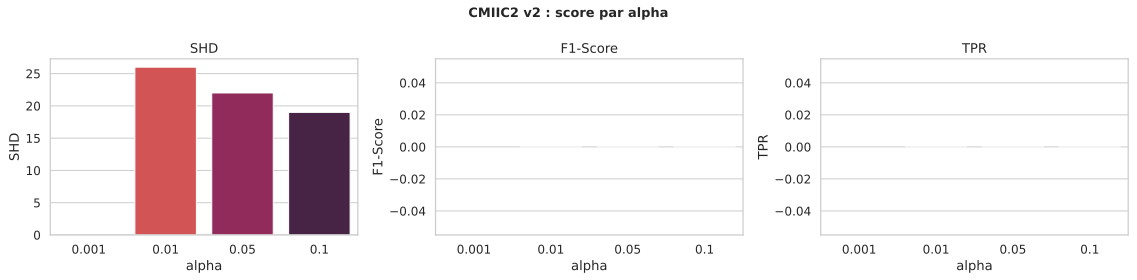

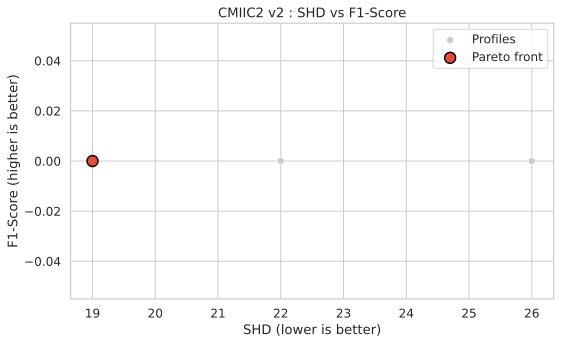


Grid Search: MIICAdapter
  Metrics: SHD, F1-Score, TPR
  Parameter combinations: 10

  [1/10] n_bins=2, discretization_method=quantile ... SHD=21.0000, F1-Score=0.0909, TPR=0.0625
  [2/10] n_bins=2, discretization_method=hartemink ... SHD=20.0000, F1-Score=0.0000, TPR=0.0000
  [3/10] n_bins=3, discretization_method=quantile ... SHD=21.0000, F1-Score=0.0000, TPR=0.0000
  [4/10] n_bins=3, discretization_method=hartemink ... SHD=22.0000, F1-Score=0.0000, TPR=0.0000
  [5/10] n_bins=4, discretization_method=quantile ... SHD=20.0000, F1-Score=0.0000, TPR=0.0000
  [6/10] n_bins=4, discretization_method=hartemink ... SHD=20.0000, F1-Score=0.0000, TPR=0.0000
  [7/10] n_bins=5, discretization_method=quantile ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [8/10] n_bins=5, discretization_method=hartemink ... SHD=20.0000, F1-Score=0.0000, TPR=0.0000
  [9/10] n_bins=6, discretization_method=quantile ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [10/10] n_bins=6, discretization_method=hartemink ...

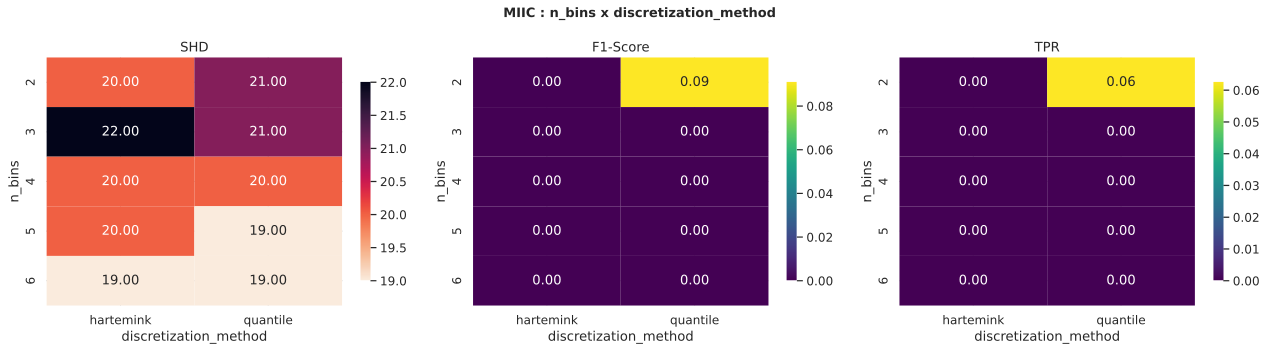

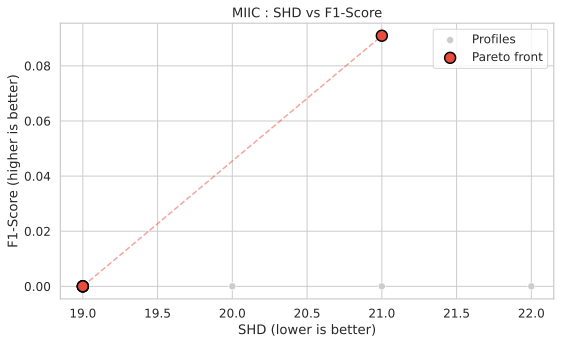


Grid Search: GHCBDeuAdapter
  Metrics: SHD, F1-Score, TPR
  Parameter combinations: 10

  [1/10] n_bins=2, discretization_method=quantile ... SHD=22.0000, F1-Score=0.1667, TPR=0.1176
  [2/10] n_bins=2, discretization_method=hartemink ... SHD=22.0000, F1-Score=0.0000, TPR=0.0000
  [3/10] n_bins=3, discretization_method=quantile ... SHD=21.0000, F1-Score=0.0000, TPR=0.0000
  [4/10] n_bins=3, discretization_method=hartemink ... SHD=22.0000, F1-Score=0.0000, TPR=0.0000
  [5/10] n_bins=4, discretization_method=quantile ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [6/10] n_bins=4, discretization_method=hartemink ... SHD=20.0000, F1-Score=0.0000, TPR=0.0000
  [7/10] n_bins=5, discretization_method=quantile ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [8/10] n_bins=5, discretization_method=hartemink ... SHD=19.0000, F1-Score=0.0000, TPR=0.0000
  [9/10] n_bins=6, discretization_method=quantile ... SHD=18.0000, F1-Score=0.0000, TPR=0.0000
  [10/10] n_bins=6, discretization_method=hartemink 

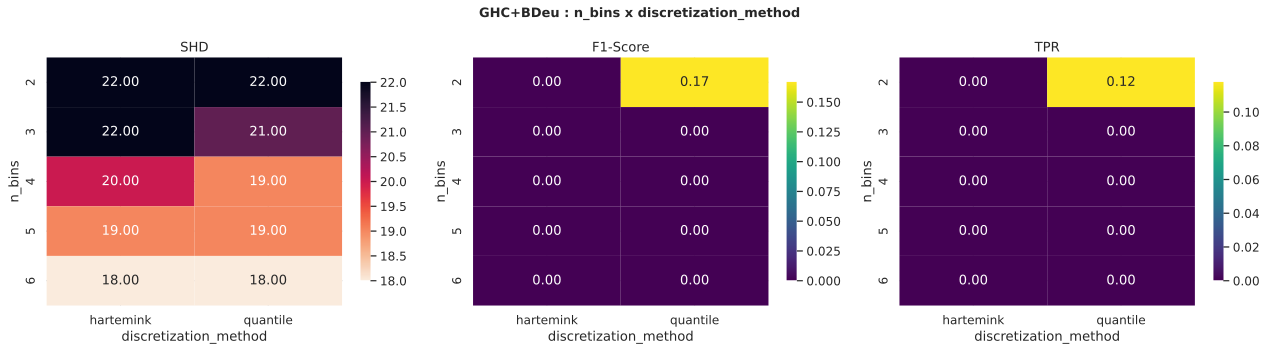

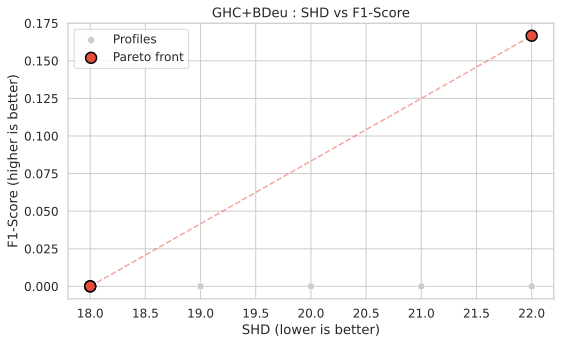


Grid Search: NOTEARSAdapter
  Metrics: SHD, F1-Score, TPR
  Parameter combinations: 20

  [1/20] lambda1=0.01, w_threshold=0.1 ... SHD=27.0000, F1-Score=0.1212, TPR=0.1818
  [2/20] lambda1=0.01, w_threshold=0.2 ... SHD=25.0000, F1-Score=0.0000, TPR=0.0000
  [3/20] lambda1=0.01, w_threshold=0.3 ... SHD=24.0000, F1-Score=0.0000, TPR=0.0000
  [4/20] lambda1=0.01, w_threshold=0.5 ... SHD=23.0000, F1-Score=0.0000, TPR=0.0000
  [5/20] lambda1=0.05, w_threshold=0.1 ... SHD=27.0000, F1-Score=0.1212, TPR=0.1818
  [6/20] lambda1=0.05, w_threshold=0.2 ... SHD=25.0000, F1-Score=0.0000, TPR=0.0000
  [7/20] lambda1=0.05, w_threshold=0.3 ... SHD=24.0000, F1-Score=0.0000, TPR=0.0000
  [8/20] lambda1=0.05, w_threshold=0.5 ... SHD=23.0000, F1-Score=0.0000, TPR=0.0000
  [9/20] lambda1=0.1, w_threshold=0.1 ... SHD=27.0000, F1-Score=0.1212, TPR=0.1818
  [10/20] lambda1=0.1, w_threshold=0.2 ... SHD=25.0000, F1-Score=0.0000, TPR=0.0000
  [11/20] lambda1=0.1, w_threshold=0.3 ... SHD=24.0000, F1-Score=0.0000,

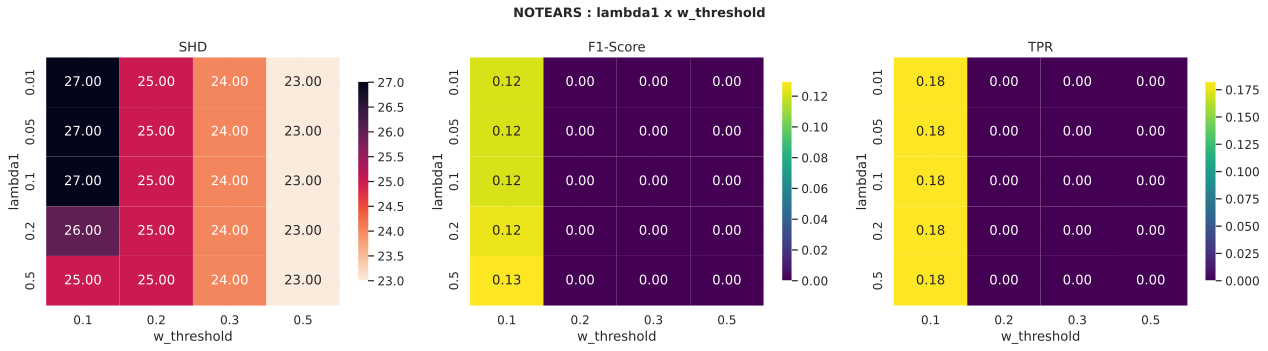

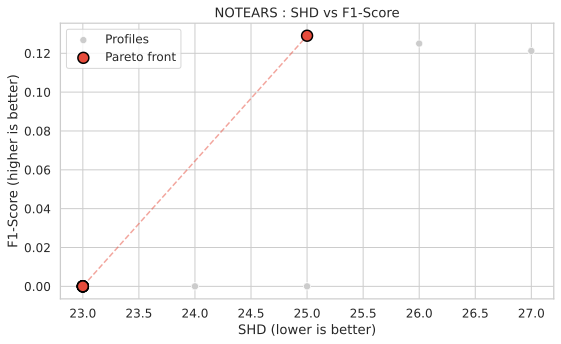


Grid Search: LiNGAMAdapter
  Metrics: SHD, F1-Score, TPR
  Parameter combinations: 4

  [1/4] measure=pwling, threshold=0.001 ... SHD=23.0000, F1-Score=0.0000, TPR=0.0000
  [2/4] measure=pwling, threshold=0.005 ... SHD=23.0000, F1-Score=0.0000, TPR=0.0000
  [3/4] measure=pwling, threshold=0.01 ... SHD=23.0000, F1-Score=0.0000, TPR=0.0000
  [4/4] measure=pwling, threshold=0.05 ... SHD=22.0000, F1-Score=0.0000, TPR=0.0000

  Best SHD: 22.0000
    params: {'measure': 'pwling', 'threshold': 0.05}

  Best F1-Score: 0.0000
    params: {'measure': 'pwling', 'threshold': 0.001}

  Best TPR: 0.0000
    params: {'measure': 'pwling', 'threshold': 0.001}




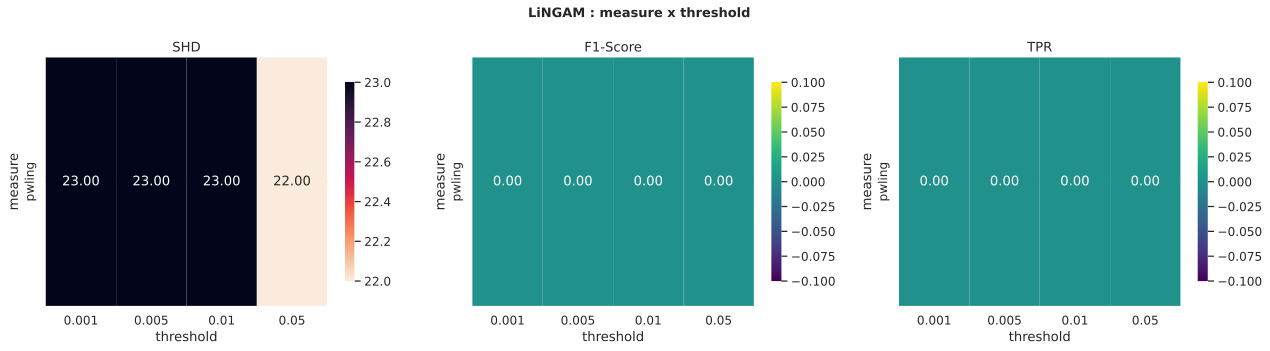

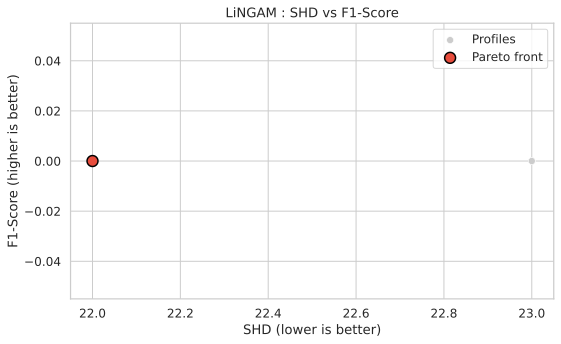

In [4]:
grid_searches = {}

for name, algo_class, param_grid, fixed_params in algo_configs:
    gs = GridSearch(
        algorithm_class=algo_class,
        param_grid=param_grid,
        dataset=dataset,
        golden_structure=ground_truth,
        metrics=metrics,
        fixed_params=fixed_params if fixed_params else None,
        objectives=objectives,
    )
    gs.run()
    grid_searches[name] = gs

    df = gs.get_results_dataframe()
    param_cols = [c for c in df.columns if c not in metric_names + ["error"]]

    # --- Bar chart (1 param) or Heatmap (2 params) per metric ---
    if len(param_cols) == 1:
        p = param_cols[0]
        df[p] = df[p].astype(str)
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))
        fig.suptitle(f"{name} : score par {p}", fontsize=13, fontweight="bold")
        for ax, mn, palette in zip(axes, metric_names, ["rocket_r", "viridis", "viridis"]):
            sns.barplot(data=df, x=p, y=mn, ax=ax, hue=p, palette=palette, legend=False)
            ax.set_title(mn)
        plt.tight_layout()
        plt.show()

    elif len(param_cols) == 2:
        p1, p2 = param_cols
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f"{name} : {p1} x {p2}", fontsize=13, fontweight="bold")
        for ax, mn, cmap in zip(axes, metric_names, ["rocket_r", "viridis", "viridis"]):
            pivot = df.pivot_table(index=p1, columns=p2, values=mn, aggfunc="mean")
            sns.heatmap(pivot, annot=True, fmt=".2f", cmap=cmap, ax=ax, cbar_kws={"shrink": 0.8})
            ax.set_title(mn)
        plt.tight_layout()
        plt.show()

    # --- Scatter SHD vs F1 + Pareto front ---
    valid = [r for r in gs.results if "SHD" in r.scores and "F1-Score" in r.scores]
    if valid:
        front = pareto_front(gs.results, pareto_objectives)
        front_ids = {id(r) for r in front}

        scatter_df = pd.DataFrame([
            {"SHD": r.scores["SHD"], "F1-Score": r.scores["F1-Score"],
             "Pareto": "Pareto front" if id(r) in front_ids else "Profile"}
            for r in valid
        ])

        fig, ax = plt.subplots(figsize=(8, 5))
        sns.scatterplot(
            data=scatter_df[scatter_df["Pareto"] == "Profile"],
            x="SHD", y="F1-Score", color="#cccccc", s=50, ax=ax, label="Profiles"
        )
        sns.scatterplot(
            data=scatter_df[scatter_df["Pareto"] == "Pareto front"],
            x="SHD", y="F1-Score", color="#e74c3c", s=120, ax=ax,
            edgecolor="black", linewidth=1.5, label="Pareto front", zorder=5
        )
        if len(front) > 1:
            front_sorted = sorted(front, key=lambda r: r.scores["SHD"])
            ax.plot(
                [r.scores["SHD"] for r in front_sorted],
                [r.scores["F1-Score"] for r in front_sorted],
                color="#e74c3c", linestyle="--", alpha=0.5
            )
        ax.set_xlabel("SHD (lower is better)")
        ax.set_ylabel("F1-Score (higher is better)")
        ax.set_title(f"{name} : SHD vs F1-Score")
        ax.legend()
        plt.tight_layout()
        plt.show()

## 4. Tableau recapitulatif

In [5]:
summary_rows = []
for name, gs in grid_searches.items():
    row = {"Algorithm": name}
    for mn in metric_names:
        row[f"Best {mn}"] = gs.best_score(mn)
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows).set_index("Algorithm")
summary_df

,Best SHD,Best F1-Score,Best TPR
Algorithm,,,
CPC v1,18.0,0.000000,0.000000
CPC2 v2,18.0,0.000000,0.000000
CMIIC v1,19.0,0.000000,0.000000
CMIIC2 v2,19.0,0.000000,0.000000
MIIC,19.0,0.090909,0.062500
GHC+BDeu,18.0,0.166667,0.117647
NOTEARS,23.0,0.129032,0.181818
LiNGAM,22.0,0.000000,0.000000


## 5. Selection des meilleurs profils

Pour chaque algo, on selectionne parmi les profils Pareto-optimaux (SHD vs F1) :
- **Selection A** : celui avec le plus petit SHD
- **Selection B** : celui avec le plus grand F1

In [6]:
algo_names = list(grid_searches.keys())

selection_a = {}  # best Pareto by SHD
selection_b = {}  # best Pareto by F1

for name, gs in grid_searches.items():
    a = best_pareto(gs.results, pareto_objectives, rank_by="SHD", rank_lower_is_better=True)
    b = best_pareto(gs.results, pareto_objectives, rank_by="F1-Score", rank_lower_is_better=False)
    selection_a[name] = a
    selection_b[name] = b

for label, sel in [("Selection A (Pareto min SHD)", selection_a), ("Selection B (Pareto max F1)", selection_b)]:
    print(f"\n{label}:")
    for name, r in sel.items():
        if r:
            print(f"  {name:<15} SHD={r.scores['SHD']:<6.1f} F1={r.scores['F1-Score']:<6.3f} params={r.params}")
        else:
            print(f"  {name:<15} No valid result")


Selection A (Pareto min SHD):
  CPC v1          SHD=18.0   F1=0.000  params={'alpha': 0.001, 'max_conditioning_set_size': 2}
  CPC2 v2         SHD=18.0   F1=0.000  params={'alpha': 0.001, 'max_conditioning_set_size': 2}
  CMIIC v1        SHD=19.0   F1=0.000  params={'alpha': 0.1}
  CMIIC2 v2       SHD=19.0   F1=0.000  params={'alpha': 0.1}
  MIIC            SHD=19.0   F1=0.000  params={'n_bins': 5, 'discretization_method': 'quantile'}
  GHC+BDeu        SHD=18.0   F1=0.000  params={'n_bins': 6, 'discretization_method': 'quantile'}
  NOTEARS         SHD=23.0   F1=0.000  params={'lambda1': 0.01, 'w_threshold': 0.5}
  LiNGAM          SHD=22.0   F1=0.000  params={'measure': 'pwling', 'threshold': 0.05}

Selection B (Pareto max F1):
  CPC v1          SHD=18.0   F1=0.000  params={'alpha': 0.001, 'max_conditioning_set_size': 2}
  CPC2 v2         SHD=18.0   F1=0.000  params={'alpha': 0.001, 'max_conditioning_set_size': 2}
  CMIIC v1        SHD=19.0   F1=0.000  params={'alpha': 0.1}
  CMIIC2 v2

## 6. Scatter comparatif : tous les algos

Un point par algo, hyperparametres en legende.

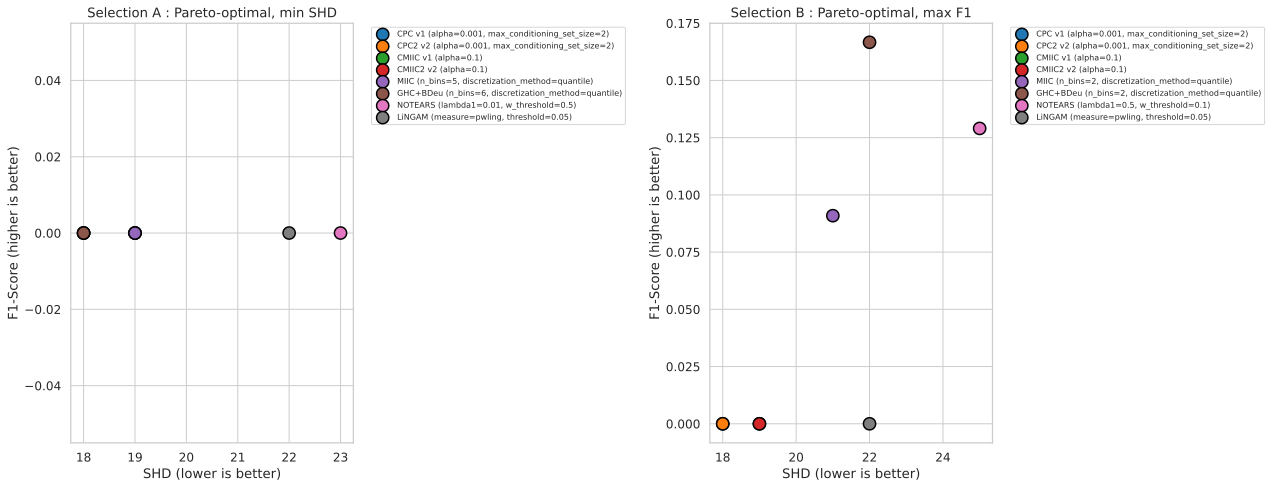

In [7]:
palette = sns.color_palette("tab10", len(algo_names))

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for ax, sel, title in zip(axes,
    [selection_a, selection_b],
    ["Selection A : Pareto-optimal, min SHD", "Selection B : Pareto-optimal, max F1"]
):
    for idx, name in enumerate(algo_names):
        r = sel[name]
        if r is None:
            continue
        params_str = ", ".join(f"{k}={v}" for k, v in r.params.items())
        ax.scatter(
            r.scores["SHD"], r.scores["F1-Score"],
            color=palette[idx], s=150, edgecolors="black", linewidths=1.5,
            label=f"{name} ({params_str})", zorder=5
        )
    ax.set_xlabel("SHD (lower is better)")
    ax.set_ylabel("F1-Score (higher is better)")
    ax.set_title(title)
    ax.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

## 7. Structures apprises (CPDAGs)

Visualisation des CPDAGs appris par chaque algo pour les selections A et B, avec le golden BN en reference.

In [8]:
def cpdag_to_dot(structure, feature_names=None):
    """Convert a Structure's CPDAG to a labeled dot string."""
    mg = structure.cpdag
    lines = ["digraph {"]
    for node_id in sorted(mg.nodes()):
        label = feature_names[node_id] if feature_names else str(node_id)
        lines.append(f'  {node_id} [label="{label}"];')
    for tail, head in mg.arcs():
        lines.append(f"  {tail} -> {head};")
    for n1, n2 in mg.edges():
        lines.append(f"  {n1} -> {n2} [dir=none];")
    lines.append("}")
    return "\n".join(lines)


def run_best_profiles(selection):
    """Re-run the best profile for each algo and return learned structures."""
    structures = {}
    for name in selection:
        r = selection[name]
        if r is None:
            continue
        algo_class, fixed_params = algo_configs_map[name]
        all_params = {**fixed_params, **r.params}
        algo = algo_class(**all_params)
        structures[name] = algo.learn_structure(dataset)
    return structures


def plot_pairwise_heatmaps(structures, title_prefix):
    """Plot pairwise heatmaps for each metric."""
    names = list(structures.keys())
    n = len(names)

    for metric in metrics:
        matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i == j:
                    matrix[i, j] = 0.0
                else:
                    matrix[i, j] = metric.compute(
                        ref=structures[names[i]],
                        test=structures[names[j]]
                    )

        lower_better = objectives.get(metric.name(), True)
        cmap = "rocket_r" if lower_better else "viridis"

        matrix_df = pd.DataFrame(matrix, index=names, columns=names)
        fig, ax = plt.subplots(figsize=(9, 7))
        sns.heatmap(matrix_df, annot=True, fmt=".2f", cmap=cmap, ax=ax,
                    cbar_kws={"shrink": 0.8}, linewidths=0.5, square=True)
        ax.set_title(f"{title_prefix} - Pairwise {metric.name()}")
        plt.tight_layout()
        plt.show()

Re-running best profiles...
  Selection A (Pareto min SHD)...
  Selection B (Pareto max F1)...
Done.

Golden BN CPDAG (18 arcs, 0 edges):


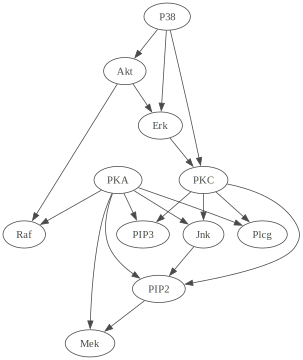

In [9]:
print("Re-running best profiles...")
print("  Selection A (Pareto min SHD)...")
structures_a = run_best_profiles(selection_a)
print("  Selection B (Pareto max F1)...")
structures_b = run_best_profiles(selection_b)
print("Done.\n")

feature_names = dataset.feature_names

print(f"Golden BN CPDAG ({ground_truth.cpdag.sizeArcs()} arcs, {ground_truth.cpdag.sizeEdges()} edges):")
gnb.showDot(cpdag_to_dot(ground_truth, feature_names))

### 7a. CPDAGs - Selection A (Pareto min SHD)


CPC v1 (alpha=0.001, max_conditioning_set_size=2) — 0 arcs, 5 edges


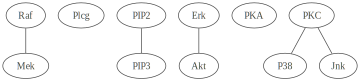


CPC2 v2 (alpha=0.001, max_conditioning_set_size=2) — 0 arcs, 5 edges


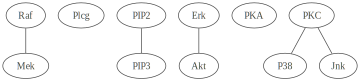


CMIIC v1 (alpha=0.1) — 0 arcs, 6 edges


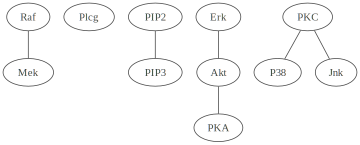


CMIIC2 v2 (alpha=0.1) — 0 arcs, 6 edges


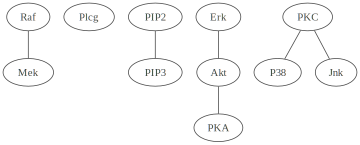


MIIC (n_bins=5, discretization_method=quantile) — 0 arcs, 6 edges


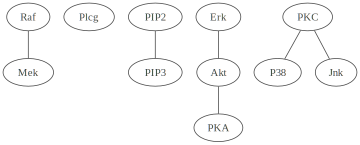


GHC+BDeu (n_bins=6, discretization_method=quantile) — 0 arcs, 5 edges


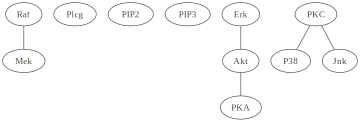


NOTEARS (lambda1=0.01, w_threshold=0.5) — 6 arcs, 6 edges


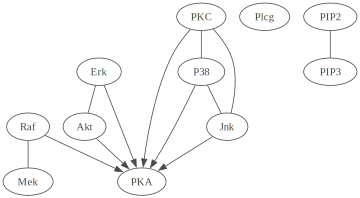


LiNGAM (measure=pwling, threshold=0.05) — 4 arcs, 6 edges


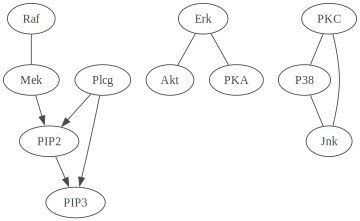

In [10]:
for name, structure in structures_a.items():
    r = selection_a[name]
    params_str = ", ".join(f"{k}={v}" for k, v in r.params.items())
    print(f"\n{name} ({params_str}) — {structure.cpdag.sizeArcs()} arcs, {structure.cpdag.sizeEdges()} edges")
    gnb.showDot(cpdag_to_dot(structure, feature_names))

### 7b. CPDAGs - Selection B (Pareto max F1)


CPC v1 (alpha=0.001, max_conditioning_set_size=2) — 0 arcs, 5 edges


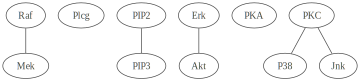


CPC2 v2 (alpha=0.001, max_conditioning_set_size=2) — 0 arcs, 5 edges


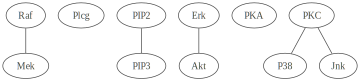


CMIIC v1 (alpha=0.1) — 0 arcs, 6 edges


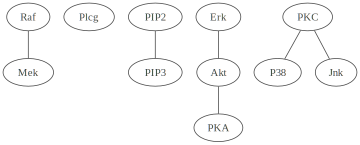


CMIIC2 v2 (alpha=0.1) — 0 arcs, 6 edges


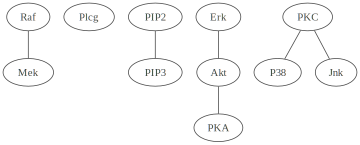


MIIC (n_bins=2, discretization_method=quantile) — 4 arcs, 2 edges


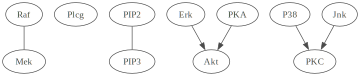


GHC+BDeu (n_bins=2, discretization_method=quantile) — 6 arcs, 1 edges


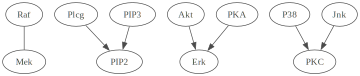


NOTEARS (lambda1=0.5, w_threshold=0.1) — 16 arcs, 4 edges


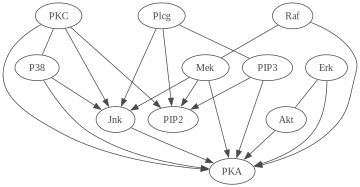


LiNGAM (measure=pwling, threshold=0.05) — 4 arcs, 6 edges


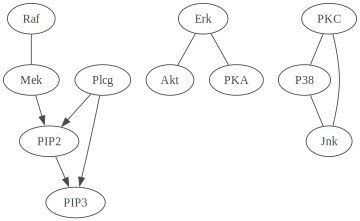

In [11]:
for name, structure in structures_b.items():
    r = selection_b[name]
    params_str = ", ".join(f"{k}={v}" for k, v in r.params.items())
    print(f"\n{name} ({params_str}) — {structure.cpdag.sizeArcs()} arcs, {structure.cpdag.sizeEdges()} edges")
    gnb.showDot(cpdag_to_dot(structure, feature_names))

## 8. Heatmaps pairwise

### 8a. Pairwise heatmaps - Selection A (Pareto min SHD)

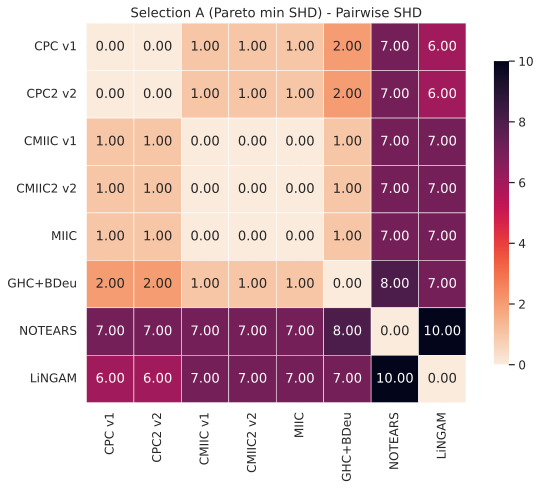

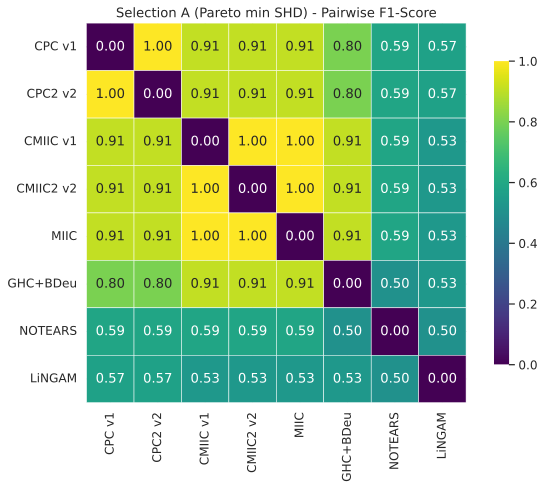

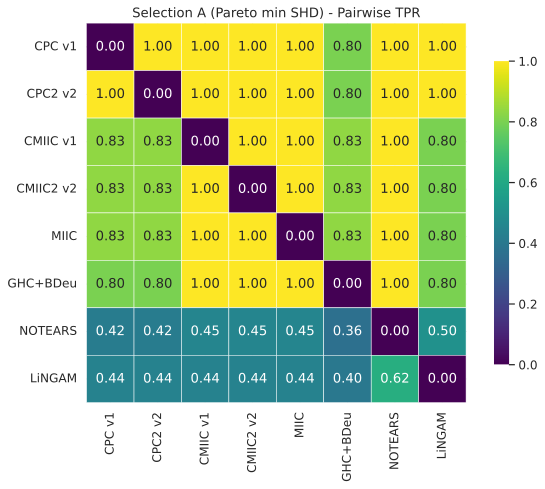

In [12]:
plot_pairwise_heatmaps(structures_a, "Selection A (Pareto min SHD)")

### 8b. Pairwise heatmaps - Selection B (Pareto max F1)

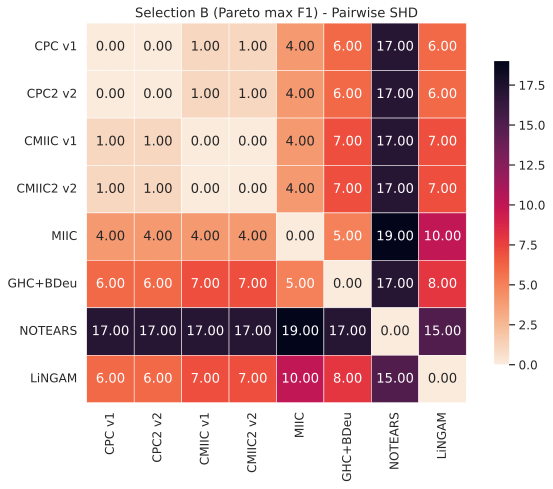

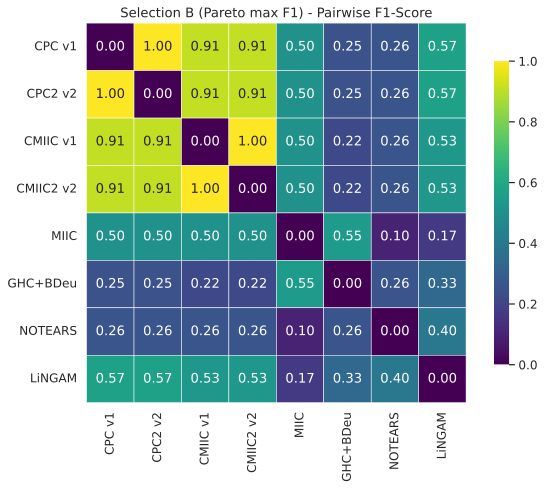

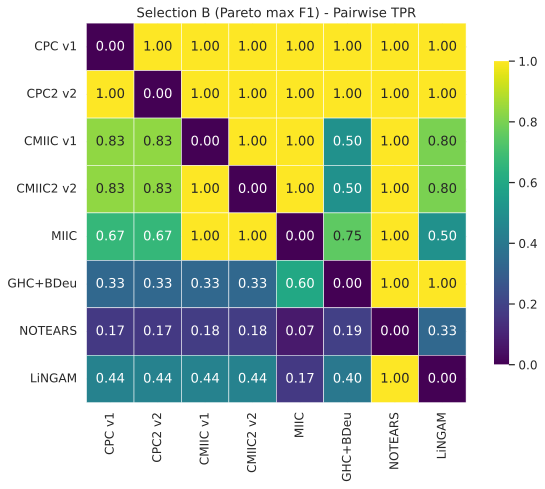

In [13]:
plot_pairwise_heatmaps(structures_b, "Selection B (Pareto max F1)")